<a href="https://colab.research.google.com/github/coolpunch/udemy_deep_learning/blob/master/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import PIL

In [2]:
print(tf.__version__)

2.4.1


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [25]:
# scaling 
x_tr = x_train/255
x_te = x_test/255
# flattening arrays to make sure it suits cnn
y_tr = y_train.flatten()
y_te = y_test.flatten()

In [26]:
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000,)
(10000,)


In [38]:
# adding cnn layers

# input 
i = tf.keras.layers.Input((32,32,3)) 
i.shape

TensorShape([None, 32, 32, 3])

In [39]:
# adding first cnn layer
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=2, activation='relu')(i)
x.shape

TensorShape([None, 15, 15, 64])

In [40]:
# adding second cnn layer
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=2, activation='relu')(x)
x.shape

TensorShape([None, 7, 7, 128])

In [41]:
# adding third cnn layer 
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=2, activation='relu')(x)
x.shape

TensorShape([None, 3, 3, 256])

In [42]:
# flattening the result to prepare it for dense layer
x = tf.keras.layers.Flatten() (x)
x.shape

TensorShape([None, 2304])

In [43]:
# dropping out some of the nodes
x = tf.keras.layers.Dropout(0.2) (x)
x.shape

TensorShape([None, 2304])

In [44]:
# adding first dense layer
x = tf.keras.layers.Dense(1024, activation='relu', ) (x)
x.shape

TensorShape([None, 1024])

In [45]:
# adding second dropout layer
x = tf.keras.layers.Dropout(0.2) (x)
x.shape

TensorShape([None, 1024])

In [46]:
# adding second dense layer
x = tf.keras.layers.Dense(512, activation= 'relu') (x)
x.shape

TensorShape([None, 512])

In [47]:
# adding final layer the number of nodes in the final layer must be equal to the number of 
# unique classes of outputs which in this case will be 10 
K = len(set(y_tr))

x = tf.keras.layers.Dense(K, activation='softmax') (x)
x.shape

TensorShape([None, 10])

In [48]:
model = tf.keras.Model(i,x)

In [49]:
# compiling model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(x_tr, y_tr, validation_data=(x_te,y_te), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 149s 95ms/step - loss: 1.7057 - accuracy: 0.3608 - val_loss: 1.1929 - val_accuracy: 0.5687
Epoch 2/10
1563/1563 [==============================] - 146s 94ms/step - loss: 1.1552 - accuracy: 0.5871 - val_loss: 1.0756 - val_accuracy: 0.6222
Epoch 3/10
1563/1563 [==============================] - 146s 94ms/step - loss: 0.9438 - accuracy: 0.6648 - val_loss: 0.9763 - val_accuracy: 0.6557
Epoch 4/10
1563/1563 [==============================] - 147s 94ms/step - loss: 0.7929 - accuracy: 0.7181 - val_loss: 0.8881 - val_accuracy: 0.6886
Epoch 5/10
1563/1563 [==============================] - 146s 94ms/step - loss: 0.6726 - accuracy: 0.7633 - val_loss: 0.9031 - val_accuracy: 0.6918
Epoch 6/10
1563/1563 [==============================] - 146s 93ms/step - loss: 0.5682 - accuracy: 0.7963 - val_loss: 0.9018 - val_accuracy: 0.6978
Epoch 7/10
1563/1563 [==============================] - 148s 95ms/step - loss: 0.4797 - accuracy: 0.8283 - val_loss: 0

In [37]:
# clearning session
# tf.keras.backend.clear_session()

In [51]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

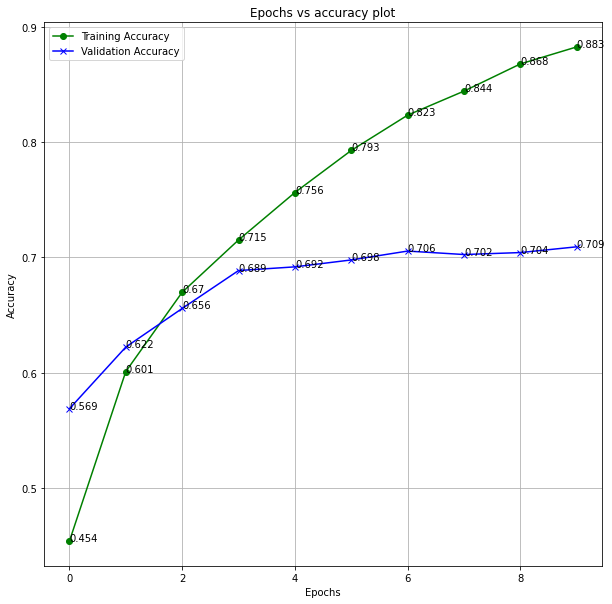

In [52]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(train_acc, color='g', label='Training Accuracy',marker='o')
for i in range(len(train_acc)): plt.text(i,train_acc[i],round(train_acc[i], 3))
plt.plot(val_acc, color='b', label='Validation Accuracy', marker='x')
for i in range(len(val_acc)): plt.text(i,val_acc[i],round(val_acc[i], 3))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs accuracy plot')
plt.legend()

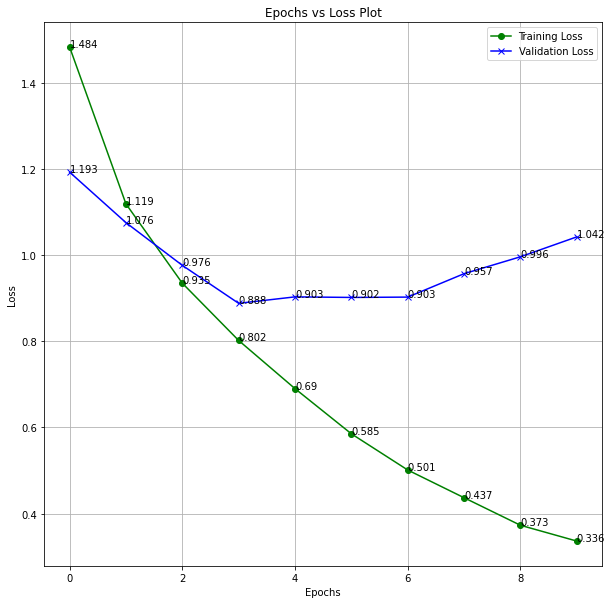

In [53]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(train_loss, color='g', label='Training Loss', marker='o')
for i in range(len(train_loss)): plt.text(i,train_loss[i],round(train_loss[i], 3))
plt.plot(val_loss, color='b', label='Validation Loss', marker='x')
for i in range(len(val_loss)): plt.text(i,val_loss[i],round(val_loss[i], 3))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss Plot')
plt.legend()


In [54]:
# let us create a new model with data agumentation

# batch size
b_size = x_tr.shape[0]/10

# creating image data generator
im_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=0.2, 
                                                                    width_shift_range=0.2,
                                                                    horizontal_flip=True
                                                                    )

# creating training data generator
im_train_generator = im_data_generator.flow(x_tr, y_tr, b_size)


In [59]:
# number of epochs for 1 batch 
epochs_per_batch = 5.0
history_agument = model.fit_generator(im_train_generator, steps_per_epoch= epochs_per_batch)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


TypeError: ignored

In [ ]:
x_tr.shape[0]

50000

In [62]:
# let us create a model with normalization and adding pooling layers to the network.
# model 1
i_1 = tf.keras.layers.Input(shape=(32, 32, 3))
i_1.shape

TensorShape([None, 32, 32, 3])

In [63]:
# model 1 
# adding first convolution layer
x_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same') (i_1)
x_1.shape

TensorShape([None, 32, 32, 32])

In [64]:
# model_1
# adding batch normalization layer
x_1 = tf.keras.layers.BatchNormalization() (x_1)
x_1.shape

TensorShape([None, 32, 32, 32])

In [65]:
# model_1
# adding another convolution layer
x_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same') (x_1)
x_1.shape

TensorShape([None, 32, 32, 32])

In [66]:
# model_1
# adding batch normalization
x_1 = tf.keras.layers.BatchNormalization() (x_1)
x_1.shape

TensorShape([None, 32, 32, 32])

In [67]:
# model_1
# adding max pooling layer
x_1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2)) (x_1)
x_1.shape

TensorShape([None, 16, 16, 32])

In [68]:
# model_1
x_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same') (x_1)
x_1.shape


TensorShape([None, 16, 16, 64])

In [69]:
# model_1
# adding batch normalization
x_1 = tf.keras.layers.BatchNormalization() (x_1)
x_1.shape

TensorShape([None, 16, 16, 64])

In [70]:
# model_1
# adding max pooling layer
x_1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2)) (x_1)
x_1.shape

TensorShape([None, 8, 8, 64])

In [71]:
# model_1 
# adding convolution layer
x_1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same') (x_1)
x_1.shape

TensorShape([None, 8, 8, 128])

In [72]:
# model_1 
# adding batch normalization layer
x_1 = tf.keras.layers.BatchNormalization() (x_1)
x_1.shape

TensorShape([None, 8, 8, 128])

In [73]:
# model_1
# adding another convolution layer
x_1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same') (x_1)
x_1.shape

TensorShape([None, 8, 8, 128])

In [74]:
# model_1
# adding batch normalization layer
x_1 = tf.keras.layers.BatchNormalization() (x_1)
x_1.shape

TensorShape([None, 8, 8, 128])

In [75]:
# model_1
# adding max pooling layer to the network
x_1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2)) (x_1)
x_1.shape

TensorShape([None, 4, 4, 128])

In [76]:
# model_1
# flattening the output 
x_1 = tf.keras.layers.Flatten() (x_1)
x_1.shape

TensorShape([None, 2048])

In [77]:
# model_1
# adding dropout layer
x_1 = tf.keras.layers.Dropout(0.2) (x_1)
x_1.shape

TensorShape([None, 2048])

In [78]:
# model_1
# adding dense layer
x_1 = tf.keras.layers.Dense(units=1024, activation='relu') (x_1)
x_1.shape

TensorShape([None, 1024])

In [79]:
# model_1
# adding dropout layer
x_1 = tf.keras.layers.Dropout(0.3) (x_1)
x_1.shape

TensorShape([None, 1024])

In [80]:
# model_1
# adding last layer
# total number of outputs will K
x_1 = tf.keras.layers.Dense(K, activation='softmax') (x_1)
x_1.shape

TensorShape([None, 10])

In [81]:
# creating model
model_1 = tf.keras.Model(i_1, x_1)

In [82]:
# compiling model
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [83]:
# fit model
history_1 = model_1.fit(x_tr, y_tr, validation_data=(x_te, y_te), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 384s 245ms/step - loss: 1.7476 - accuracy: 0.4579 - val_loss: 1.2271 - val_accuracy: 0.5773
Epoch 2/10
1563/1563 [==============================] - 378s 242ms/step - loss: 0.9122 - accuracy: 0.6824 - val_loss: 0.8266 - val_accuracy: 0.7192
Epoch 3/10
1563/1563 [==============================] - 378s 242ms/step - loss: 0.7209 - accuracy: 0.7489 - val_loss: 0.7888 - val_accuracy: 0.7328
Epoch 4/10
1563/1563 [==============================] - 382s 244ms/step - loss: 0.6011 - accuracy: 0.7927 - val_loss: 0.6847 - val_accuracy: 0.7674
Epoch 5/10
1563/1563 [==============================] - 382s 244ms/step - loss: 0.5088 - accuracy: 0.8220 - val_loss: 0.6708 - val_accuracy: 0.7834
Epoch 6/10
1563/1563 [==============================] - 381s 244ms/step - loss: 0.4237 - accuracy: 0.8531 - val_loss: 0.6389 - val_accuracy: 0.7971
Epoch 7/10
1563/1563 [==============================] - 380s 243ms/step - loss: 0.3667 - accuracy: 0.8751 - val_

In [61]:
del i_1
del x_1

NameError: ignored

In [57]:
epochs_per_batch

NameError: ignored